<a href="https://colab.research.google.com/github/Jit562/Deep-Learning-Projects/blob/main/Face_Mask_Detection_CNN_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

### **Importing Face Mask Dataset**

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:09<00:00, 16.3MB/s]
100% 163M/163M [00:09<00:00, 17.6MB/s]


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  sample_data


### **Importing the Dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3101.jpg', 'with_mask_1752.jpg', 'with_mask_1665.jpg', 'with_mask_395.jpg', 'with_mask_1340.jpg']
['with_mask_320.jpg', 'with_mask_2558.jpg', 'with_mask_2804.jpg', 'with_mask_1098.jpg', 'with_mask_3702.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1684.jpg', 'without_mask_1653.jpg', 'without_mask_1908.jpg', 'without_mask_3053.jpg', 'without_mask_2993.jpg']
['without_mask_1319.jpg', 'without_mask_2593.jpg', 'without_mask_1392.jpg', 'without_mask_3461.jpg', 'without_mask_1208.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
#Creating Labels for the two class of Images
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


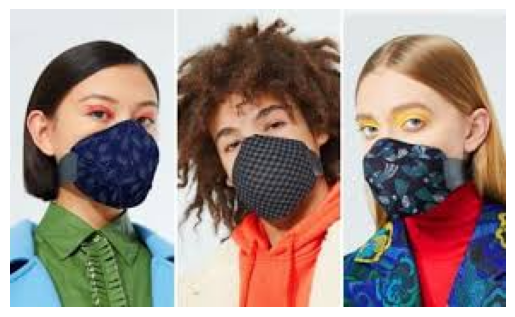

In [13]:
#Displaying the Images
path = os.path.join('/content/data/with_mask', with_mask_files[0])
with_mask_img = mpimg.imread(path)
plt.imshow(with_mask_img)
plt.axis('off')
plt.show()

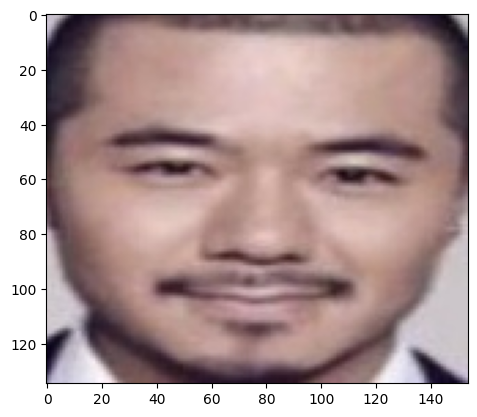

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

### **Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+
with_mask_path = '/content/data/with_mask/'

data = []


for i in with_mask_files:
  image = Image.open(with_mask_path + i)
  image = image.resize((128,128))
  image= image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for x in without_mask_files:
  image = Image.open(without_mask_path + x)
  image = image.resize((128, 128))
  image= image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[229, 232, 237],
        [229, 232, 237],
        [229, 232, 237],
        ...,
        [239, 243, 244],
        [239, 243, 244],
        [239, 242, 247]],

       [[229, 232, 237],
        [229, 232, 237],
        [229, 232, 237],
        ...,
        [237, 241, 242],
        [237, 241, 242],
        [239, 242, 246]],

       [[229, 232, 237],
        [229, 232, 237],
        [229, 232, 237],
        ...,
        [233, 237, 238],
        [233, 237, 238],
        [233, 236, 240]],

       ...,

       [[126, 200, 239],
        [128, 202, 239],
        [130, 204, 240],
        ...,
        [ 38,  74,  83],
        [ 46,  66,  76],
        [ 38,  61,  78]],

       [[126, 200, 239],
        [128, 202, 240],
        [131, 205, 241],
        ...,
        [ 70, 114, 130],
        [ 57,  89, 111],
        [ 51,  74,  92]],

       [[127, 201, 240],
        [129, 203, 240],
        [132, 206, 242],
        ...,
        [ 79, 133, 159],
        [ 57, 104, 137],
        [ 36,  67,  84]]], dtype=uint8)
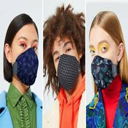

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [22]:
type(x), type(y), x.shape, y.shape

(numpy.ndarray, numpy.ndarray, (7553, 128, 128, 3), (7553,))

In [23]:
x

array([[[[229, 232, 237],
         [229, 232, 237],
         [229, 232, 237],
         ...,
         [239, 243, 244],
         [239, 243, 244],
         [239, 242, 247]],

        [[229, 232, 237],
         [229, 232, 237],
         [229, 232, 237],
         ...,
         [237, 241, 242],
         [237, 241, 242],
         [239, 242, 246]],

        [[229, 232, 237],
         [229, 232, 237],
         [229, 232, 237],
         ...,
         [233, 237, 238],
         [233, 237, 238],
         [233, 236, 240]],

        ...,

        [[126, 200, 239],
         [128, 202, 239],
         [130, 204, 240],
         ...,
         [ 38,  74,  83],
         [ 46,  66,  76],
         [ 38,  61,  78]],

        [[126, 200, 239],
         [128, 202, 240],
         [131, 205, 241],
         ...,
         [ 70, 114, 130],
         [ 57,  89, 111],
         [ 51,  74,  92]],

        [[127, 201, 240],
         [129, 203, 240],
         [132, 206, 242],
         ...,
         [ 79, 133, 159],
        

In [24]:
y

array([1, 1, 1, ..., 0, 0, 0])

### **Train Test Split**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3), (6042,), (1511,))

In [27]:
# scaling the data
x_train = x_train/255
x_test = x_test/255

In [28]:
x_train[0]

array([[[0.83137255, 0.79607843, 0.76078431],
        [0.83137255, 0.79607843, 0.76078431],
        [0.83137255, 0.79607843, 0.76078431],
        ...,
        [0.57254902, 0.57647059, 0.54509804],
        [0.57647059, 0.58039216, 0.54901961],
        [0.55294118, 0.55686275, 0.53333333]],

       [[0.83137255, 0.79607843, 0.76078431],
        [0.83137255, 0.79607843, 0.76078431],
        [0.83137255, 0.79607843, 0.76078431],
        ...,
        [0.56470588, 0.56862745, 0.5372549 ],
        [0.56470588, 0.56862745, 0.54117647],
        [0.55294118, 0.55686275, 0.53333333]],

       [[0.82352941, 0.78823529, 0.75294118],
        [0.82745098, 0.79215686, 0.75686275],
        [0.83137255, 0.79607843, 0.76078431],
        ...,
        [0.55686275, 0.56078431, 0.52941176],
        [0.56078431, 0.56470588, 0.53333333],
        [0.55294118, 0.55686275, 0.53333333]],

       ...,

       [[0.77254902, 0.83529412, 0.90196078],
        [0.80784314, 0.84313725, 0.88627451],
        [0.85098039, 0

### **Building a Convolutional Neural Networks (CNN)**

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [63]:
model = Sequential()

# kernel_size=(3, 3): Size of the convolution kernel.
# input_shape=(height, width, channels)
# MaxPooling2D - this layer is added after a convolutional layer to reduce the spatial dimensions of the feature maps
# -and control overfitting by reducing the number of parameters.

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2, activation='sigmoid'))

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,403,218 (28.24 MB)

 Trainable params: 7,403,218 (28.24 MB)

 Non-trainable params: 0 (0.00 B)

###**Earlystoping**

In [40]:
ephocs_stops = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [66]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.10, validation_data=(x_test, y_test))

Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.5639 - loss: 0.8558 - val_accuracy: 0.8451 - val_loss: 0.3914
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8246 - loss: 0.4270 - val_accuracy: 0.8776 - val_loss: 0.2946
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8717 - loss: 0.3469 - val_accuracy: 0.8504 - val_loss: 0.3086
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8660 - loss: 0.3481 - val_accuracy: 0.8928 - val_loss: 0.2575
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9029 - loss: 0.2612 - val_accuracy: 0.9047 - val_loss: 0.2545


In [67]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9266 - loss: 0.2327
Test Accuracy = 0.9046988487243652


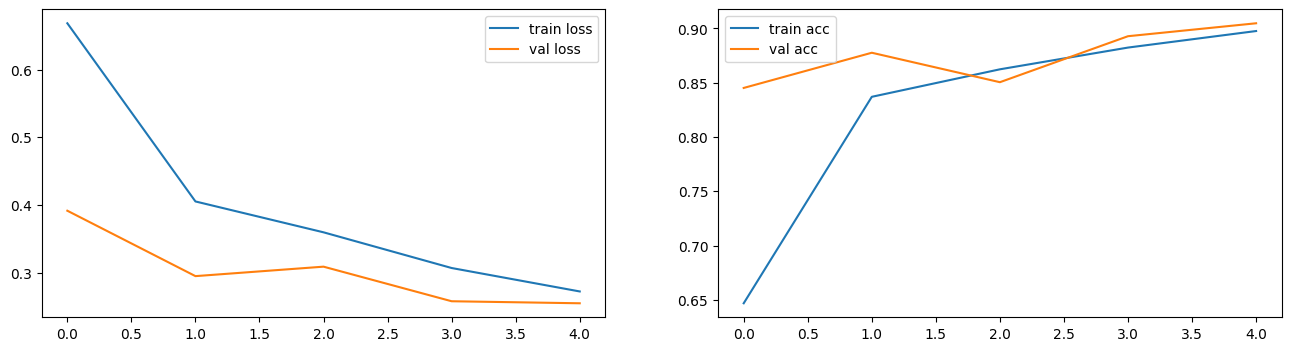

In [73]:
#Show the plot Train loss and create the sub plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
#Train loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

#Train accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

###**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


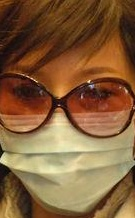

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
[[0.42436457 0.5162259 ]]
1
The person in the image is wearing a mask


In [74]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')